# Figure 3. Data sources presented as a treemap chart, weighted according to their contribution to the resource entity. 

#### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

#### Define projects data path and number of resources to print


In [3]:
# recursos = read_csv("data/mapeo_recursos.csv")
file_path = "data/mapeo_recursos.csv"
number_of_resources = 10

In [4]:

def prepare_data(data, number_of_resources): 
    mini = data["Fuente de información"]
    sources_list = mini.tolist()
    def_list = []
    for item in sources_list:
        if "," in item:
            comas = item.split(", ")
            for element in comas:
                def_list.append(element.strip())
        else: 
            def_list.append(item.strip())
    counter = Counter(def_list).most_common(number_of_resources)
    sources_dict = dict(counter)
    acronimos = read_csv("data/Fuentes-Table 1.csv")
    acronimos = acronimos.set_index('Fuente propia')
    acronimos_dict = acronimos.T.to_dict('records')
    acronimos_dict = acronimos_dict[0]
    # new dict with acronims
    corrected_dict = {}
    for key, value in sources_dict.items():
        corrected_dict.update({ acronimos_dict.get(key, "No especificado"): value })
    return corrected_dict, sources_dict

##### Run program

In [5]:
recursos = read_csv(file_path)    
corrected_dict, sources_dict = prepare_data(recursos, number_of_resources)

# Print treemap

In [6]:
import squarify

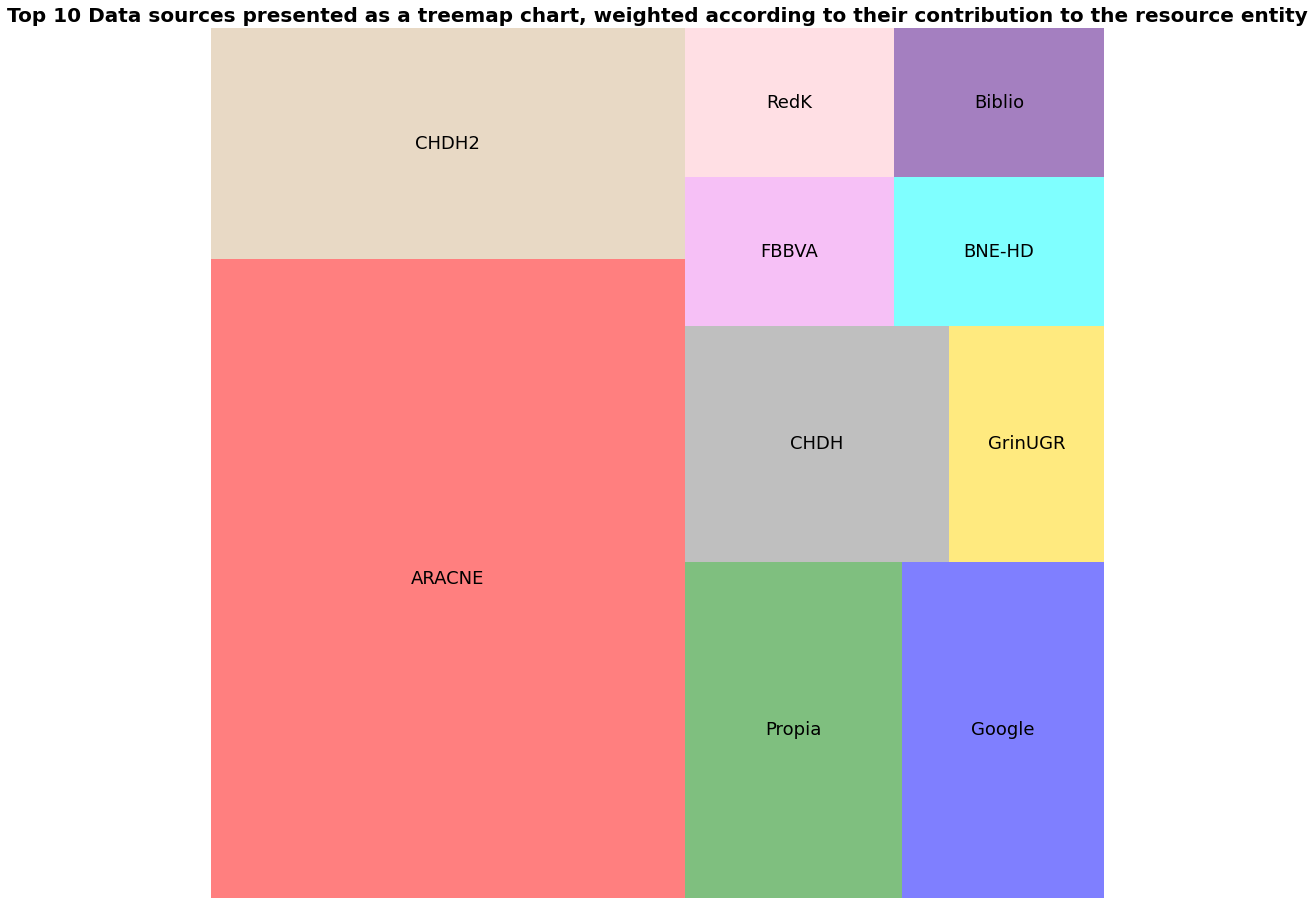

In [7]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
colors = ["red", "tan", "green", "blue", "grey", "gold", "violet", "pink", "cyan", "indigo"]
squarify.plot(sizes=corrected_dict.values(), label=corrected_dict.keys(), color=colors, alpha=.5, text_kwargs={'fontsize':18})
plt.title("Top 10 Data sources presented as a treemap chart, weighted according to their contribution to the resource entity",fontsize=20,fontweight="bold")

plt.axis('off')
plt.show() 

# Print table

In [8]:
sources_table = pd.DataFrame.from_dict(sources_dict, orient='index')
sources_table

,0
ARACNE,58
CONGRESO INTERNACIONAL HUMANIDADES DIGITALES: VISIBILIDAD Y DIFUSIÓN DE LA INVESTIGACIÓN,21
Fuente propia,14
Google,13
Congresos Humanidades Digitales Hispánicas,12
GrinUGR,7
Fundación BBVA,6
Red Knowmetrics,6
Jornada: Proyectos de humanidades digitales en la BNE,6
Bibliografía,6
